### 파이썬 머신러닝
## 비지도 학습과 데이터 전처리
---
# DBSCAN 군집화

- DBSCAN 은 반지름과 샘플갯수가 주어지면 그 반지름 안에 해당 샘플갯수만큼 있는 이웃을 확장해 나가는 군집 알고리즘이다.
- 아래 그림은 샘플갯수가 4개, 반지름이 $\epsilon$ 인 경우이다. 빨간 점은 **핵심샘플**, 노란 점은 **경계샘플**, N은 **잡음샘플** 이다.

<img src="ch03_02.jpg"/>
<p style="text-align: center;">(출처: https://en.wikipedia.org/wiki/DBSCAN)</p>

In [1]:
import numpy as np
import numpy as pd
import matplotlib.pyplot as plt

(100, 2)

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

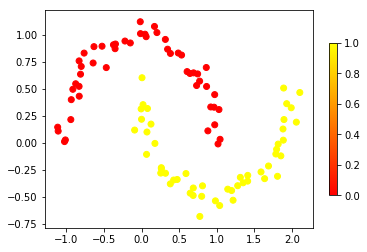

In [2]:
from sklearn.datasets import make_blobs, make_circles, make_moons

X, y = make_moons(noise=0.07, random_state=1)
display(X.shape, y)

plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.colorbar(shrink=0.7)

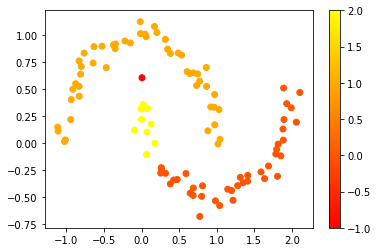

In [20]:
from sklearn.cluster import DBSCAN

X, y = make_moons(noise=0.07, random_state=1)

dbscan = DBSCAN(min_samples=2, eps=0.2)
dbscan.fit(X)

plt.scatter(X[:,0], X[:,1], c=dbscan.labels_, cmap='autumn')
plt.colorbar()

In [25]:
label = dbscan.labels_
label

array([ 0,  0,  1,  0,  0,  1,  1,  0,  0,  0,  0,  1,  2,  2,  2,  1,  1,
        1,  0,  1,  1,  0,  0,  0,  1,  1,  0,  1,  1,  1,  0,  0,  2,  0,
        0,  1,  1,  2,  1,  1,  0,  2,  0,  1,  0,  1,  1,  0,  1,  0,  1,
        2,  1,  1,  2,  1,  1,  0,  1,  0,  1,  0,  0,  1,  1,  0,  1,  0,
        1,  0,  2,  1,  0,  0,  1,  0,  1,  0,  0,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  0,  0,  1,  1,  0,  0,  1,  0,  1,  0,  1,  1],
      dtype=int64)

In [24]:
np.bincount(dbscan.labels_ + 1)

array([ 1, 40, 50,  9], dtype=int64)

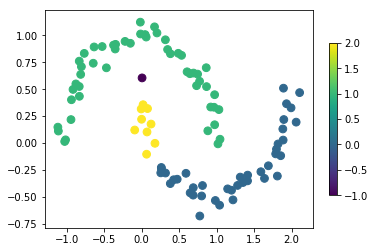

In [26]:
plt.scatter(X[:,0], X[:,1], c=label, s=60)
plt.colorbar(shrink=0.7)

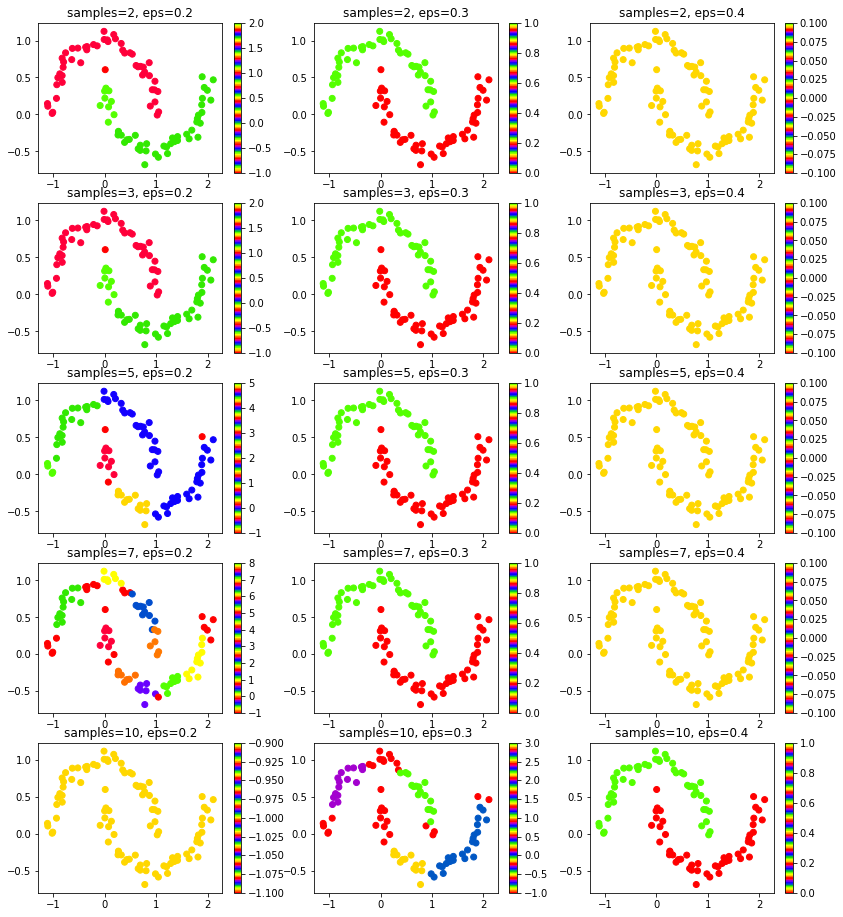

In [16]:
n=1
plt.figure(figsize=[14,16])

for samples in [2,3,5,7,10]:
    for eps in [0.2, 0.3, 0.4]:
        dbscan = DBSCAN(min_samples=samples, eps=eps)
        label = dbscan.fit_predict(X)
        
        plt.subplot(5,3,n); n+=1
        plt.title('samples=%d, eps=%.1f' % (samples,eps))
        plt.scatter(X[:,0], X[:,1], c=label, cmap='prism')
        plt.colorbar()